# <span style="color:blue">EVAC Workshop 1: Introduction to GAs in DEAP</span>

**Module leader**

Simon O'Keefe: simon.okeefe@york.ac.uk

**Graduate Teaching Assistants**

Danny Roberts: danny.roberts@york.ac.uk

Tianda Sun: tianda.sun@york.ac.uk

## <span style="color:#0073e6">Prerequisites</span>

Before participating in this practical make sure that you have watched the pre-wrokshop materials:
- Lectures 1, 2a and 2b
- Code walkthroughs 1 and 2

# <span style="color:blue">Exercise 4: Change the problem to a ‘deceptive’ problem</span>

This exercise will test your understanding of the principles in this practical and teach you about the impact of choices of representation.

First, revert back to the original Max Ones code. Now modify the Max Ones problem to implement the following ‘deceptive’ problem. A deceptive problem is just a problem that has local optima in which the algorithm can become trapped. Note that the standard Max Ones problem only has a global optimum.

In this problem, the bit string should be split into six blocks of three bits, where each block is assigned a partial fitness based on the number of ones in that block. Here is an example individual: 

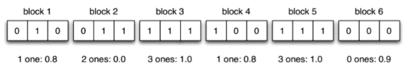

The fitness for each block of three is given as follows:
- 0 ones: partial fitness 0.9
- 1 ones: partial fitness 0.8
- 2 ones: partial fitness 0.0
- 3 ones: partial fitness 1.0

The fitness of the entire string is then determined by calculating the summed value over all blocks. For example, the individual above has a fitness of:  
``(0.8 + 0.0 + 1.0 + 0.8 + 1.0 + 0.9) = 4.5``

**Your task: Set the length of the individuals to 18 and implement this problem.**

<span style="color:green">Questions to think about:  </span>
- <span style="color:green">What is it about this fitness landscape that makes it (for some algorithms) difficult to traverse?  </span>
- <span style="color:green">What is the global optimum for this problem? What do you think the fitness landscape looks like?  </span>
- <span style="color:green">Run the algorithm multiple times. Do you get the same result each time?  </span>
- <span style="color:green">Does your algorithm find the global optimum? Why?  </span>
- <span style="color:green">Can you improve the result by changing parameters or operators?</span>

# <span style="color:blue">Exercise 5: Multiple runs</span>

Genetic algorithms are stochastic. As such, you might get a different result every time you run it; sometimes, for example, getting stuck on local optima and sometimes now. Try to modify the algorithm to run 50 times. Then record and plot a distribution of the final mean fitness scores. The matplotlib code for a density plot is:  

```plt.hist(avgRuns, density=True, bins=10)```  
(You might need to change the number of bins).

You should see that, for this problem, there's no a lot of variation. But this is unusual with harder problems.

# Colab Packages Install

In [13]:
!pip3 install deap
!pip3 install numpy
!pip3 install matplotlib
!pip3 list

Package                   Version
------------------------- ---------------
anyio                     4.2.0
appnope                   0.1.3
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
atlassian-python-api      3.39.0
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2023.7.22
cffi                      1.16.0
charset-normalizer        3.2.0
comm                      0.2.1
contourpy                 1.2.0
cycler                    0.12.1
deap                      1.4.1
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
Deprecated                1.2.14
executing                 2.0.1
fastjsonschema            2.19.1
filelock                  3.12.4
fonttools                 4.48.1
fqdn                      1.5.1
fsspec      

In [14]:
!which python3

/usr/local/bin/python3


## <span style="color:#0073e6">Learning objectives</span>

- To gain familiarity with the DEAP toolbox for Python
- To understand how to code a simple GA
- To understand crossover, selection, representation, and fitness functions
- To appreciate how algorithm parameterization can affect performance

# <span style="color:blue">Practical Instructions</span>

Below is a max-ones problem implementation (mentioned in the walkthrough) along with a simple GA solution in DEAP. Run the problem and examine the results. Then follow the exercises that follow the code.

# <span style="color:blue">Max Ones implementation</span>

In [15]:
import random
import numpy
import matplotlib.pyplot as plt
from deap import algorithms, base, creator, tools

In [16]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=18) # Set length of individual to 18
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual: list):
    fitnessLevel=[0.9, 0.8, 0.0, 1.0]
    sums = 0
    for i in range(0, len(individual), 3):
        block = individual[i:i+3]
        sums += fitnessLevel[sum(block)]
    return sums,

toolbox.register("evaluate", evalOneMax)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.01)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [17]:
logbook = tools.Logbook()
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [18]:
pop = toolbox.population(n=100)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

TypeError: 'float' object is not iterable

In [ ]:
NGEN = 100
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
         ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

In [ ]:
logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")

Text(0, 0.5, 'Mean Fitness')

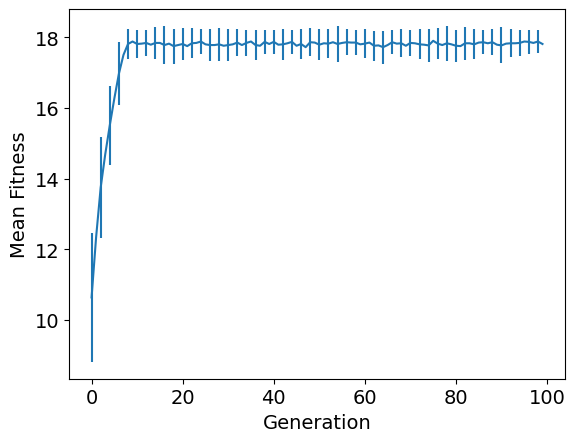

In [ ]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

In [ ]:
print(logbook)

gen	avg  	std     	min	max
0  	10.64	1.82494 	4  	14 
1  	12.35	1.63936 	8  	16 
2  	13.75	1.4239  	10 	17 
3  	14.69	1.25455 	12 	17 
4  	15.51	1.11799 	13 	18 
5  	16.27	1.03783 	14 	18 
6  	16.97	0.888313	14 	18 
7  	17.5 	0.67082 	15 	18 
8  	17.81	0.417013	16 	18 
9  	17.88	0.324962	17 	18 
10 	17.81	0.392301	17 	18 
11 	17.82	0.433128	16 	18 
12 	17.84	0.366606	17 	18 
13 	17.79	0.407308	17 	18 
14 	17.84	0.463033	16 	18 
15 	17.84	0.392938	16 	18 
16 	17.78	0.54    	15 	18 
17 	17.82	0.40939 	16 	18 
18 	17.75	0.497494	16 	18 
19 	17.78	0.414246	17 	18 
20 	17.81	0.462493	16 	18 
21 	17.75	0.497494	16 	18 
22 	17.83	0.425558	16 	18 
23 	17.84	0.463033	15 	18 
24 	17.88	0.354401	16 	18 
25 	17.8 	0.424264	16 	18 
26 	17.78	0.46    	16 	18 
27 	17.78	0.46    	16 	18 
28 	17.8 	0.469042	16 	18 
29 	17.76	0.51225 	16 	18 
30 	17.78	0.46    	16 	18 
31 	17.8 	0.447214	16 	18 
32 	17.85	0.384057	16 	18 
33 	17.78	0.46    	16 	18 
34 	17.84	0.366606	17 	18 
35 	17.88	0.40694 	16 	18 
3

# <span style="color:blue">Exercise 5: Multiple runs</span>

Genetic algorithms are stochastic. As such, you might get a different result every time you run it; sometimes, for example, getting stuck on local optima and sometimes now. Try to modify the algorithm to run 50 times. Then record and plot a distribution of the final mean fitness scores. The matplotlib code for a density plot is:  

```plt.hist(avgRuns, density=True, bins=10)```  
(You might need to change the number of bins).

You should see that, for this problem, there's no a lot of variation. But this is unusual with harder problems.